<a href="https://colab.research.google.com/github/OVP2023/time_series/blob/main/dz5_SSA_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


    Проведите анализ с помощью SSA в любом из временных рядов с первого занятия.
    При желании можете воспользоваться своим временным рядом — работа, Kaggle и т. д.
    Посмотрите на результаты с разными длинами окон.
    Обязательно визуализируйте результаты аналогично материалу с занятия.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
mean_monthly_temp = pd.read_csv("/content/drive/MyDrive/Datasets/VR/mean-monthly-air-temperature-deg.csv")
airlines_passengers = pd.read_csv("/content/drive/MyDrive/Datasets/VR/international-airline-passengers.csv")

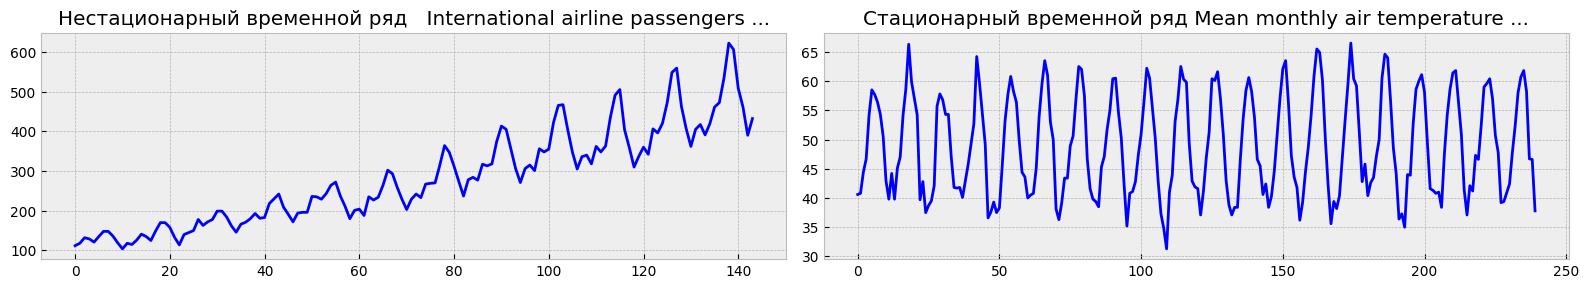

In [5]:
all_series = {
    "Нестационарный временной ряд   International airline passengers ...": airlines_passengers["Count"],
    "Стационарный временной ряд Mean monthly air temperature ...": mean_monthly_temp["Deg"]
}

with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [9]:
len(airlines_passengers)

144

In [29]:
N=144
L = 32 # Длина окна
K = N - L + 1 # Количество столбцов в матрице траекторий
# Создаем матрицу траекторий (Ганкеля)
X = np.column_stack([airlines_passengers['Count'] [i:i+L] for i in range(0,K)])

In [30]:
X

array([[112, 118, 132, ..., 362, 348, 363],
       [118, 132, 129, ..., 348, 363, 435],
       [132, 129, 121, ..., 363, 435, 491],
       ...,
       [178, 199, 199, ..., 606, 508, 461],
       [199, 199, 184, ..., 508, 461, 390],
       [199, 184, 162, ..., 461, 390, 432]])

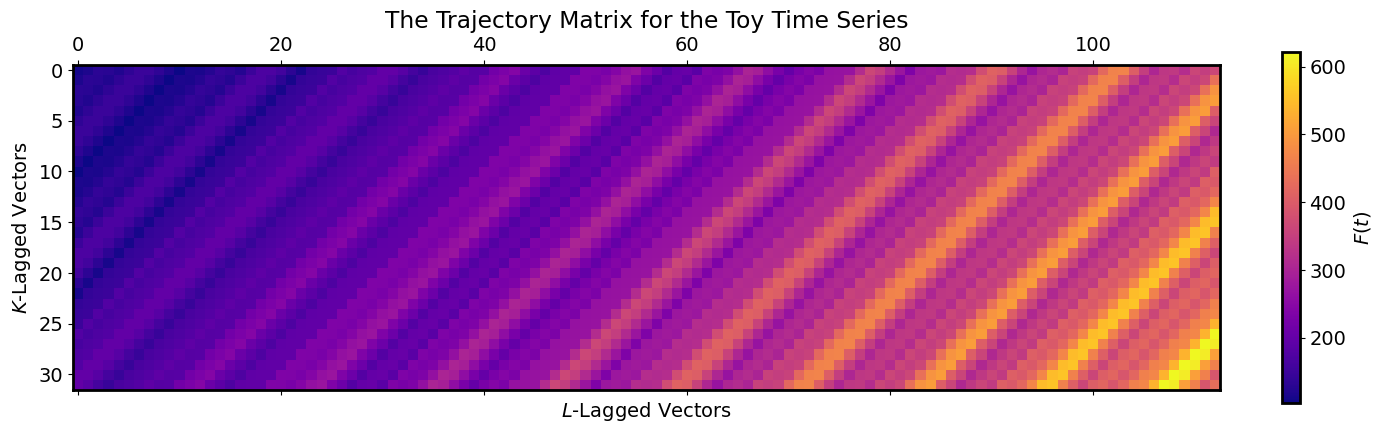

In [31]:
ax = plt.matshow(X)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Toy Time Series");

In [36]:
d = np.linalg.matrix_rank(X)
U, Sigma, V = np.linalg.svd(X)
V = V.T
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

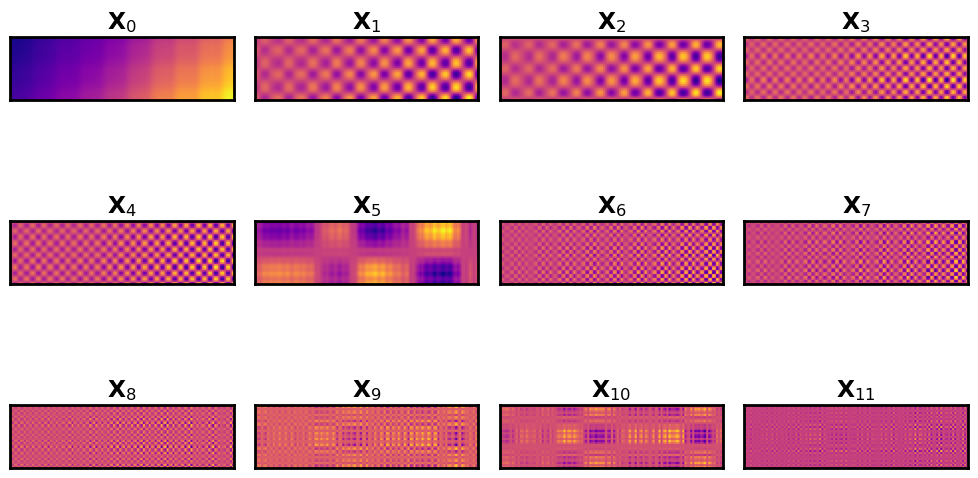

In [39]:
# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

n = min(12, d)  #In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(4,4,i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X_elem[i], title)
plt.tight_layout()